# Поиск частых наборов
## Елисеев ЕВ КЭ-403

### Задание


Разработайте программу, которая выполняет поиск частых наборов объектов в заданном наборе данных с помощью алгоритма Apriori (или одной из его модификаций). <br>
Список результирующих наборов должен содержать как наборы, так и значение поддержки для каждого набора. <br>
Параметрами программы являются набор, порог поддержки и способ упорядочивания результирующего списка наборов (по убыванию значения поддержки или лексикографическое).<br>
Проведите эксперименты на наборе данных baskets.csv (сведения о покупках в супермаркете). В экспериментах варьируйте пороговое значение поддержки (например: 1%, 3%, 5%, 10%, 15%). <br>
Выполните визуализацию результатов экспериментов в виде следующих диаграмм:
- сравнение быстродействия на фиксированном наборе данных при изменяемом пороге поддержки;
- количество частых наборов объектов различной длины на фиксированном наборе данных при изменяемом пороге поддержки.<br>

Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой связный и структурированный документ со следующими разделами: <br> 
- формулировка задания; 
- гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами; 
- рисунки с результатами визуализации; 
- пояснения, раскрывающие смысл полученных результатов.

### Программа поиска частых наборов

In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import numpy as np


# получение исходных данных
df = pd.read_csv("baskets.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,креветки,миндаль,авокадо,овощная смесь,зеленый виноград,цельнозерновая мука,батат,творог,энергетический напиток,томатный сок,низкокалорийный йогурт,зеленый чай,мед,салат,минеральная вода,лосось,ягодный сок,замороженный смузи,шпинат,оливковое масло
1,гамбургер,фрикадельки,яйца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,чатни,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,индейка,авокадо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,минеральная вода,молоко,энергетический батончик,рис,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# функция поиска частых наборов
def find_frequent_itemsets(df: pd.DataFrame, 
                           min_supp: float=0.1, 
                           sort_by: str='supp', 
                           min_items: int=1) -> pd.DataFrame:
    
    def desk_supp_sort(items):
        return items.sort_values(by='support', ascending=False)
    
    def lexicographic_sort(items):
        return items.sort_values(by='itemsets')
    
    SORT_METHOD = {'supp': desk_supp_sort,
                   'lex': lexicographic_sort}

    # Преобразование данных в список списков для подачи в метод fit
    transactions = df.values.tolist()

    # Удаление значений NaN из транзакций
    transactions = [[item for item in transaction if not pd.isnull(item)] for transaction in transactions]

    # Преобразование в разряженную матрицу
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    transactions_matrix = pd.DataFrame(te_ary, columns=te.columns_)
    
    # Поиск частых наборов
    frequent_itemsets = apriori(transactions_matrix, min_support=min_supp, use_colnames=True)
    
    # Сортировка элементов в каждом наборе
    frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: sorted(list(x)))
    frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(lambda x: x if len(x) >= min_items else None)
    frequent_itemsets.dropna(inplace=True)
    
    return SORT_METHOD[sort_by](frequent_itemsets)

### Эксперименты

In [16]:
# Первые 10 наборов отсортированных по поддержке с минимальной поддержкой 0.01
freq_items = find_frequent_itemsets(df, min_supp=0.01, sort_by='supp')
freq_items.head(20)

,support,itemsets
31,0.238368,[минеральная вода]
26,0.187975,[макароны]
73,0.179709,[яйца]
20,0.170911,[картофель-фри]
69,0.163845,[шоколад]
17,0.132116,[зеленый чай]
32,0.129583,[молоко]
9,0.098254,[говяжий фарш]
15,0.095321,[замороженные овощи]
5,0.095054,[блинчики]


Результаты можно интерпретировать в целом, как топ 20 самых популярных продуктов <br>
Чаще всего люди докупают недостающие продукты домой, либо воду и продукты быстрого питания, чтобы<br>
утолить голод и жажду

In [4]:
# Самый длинный набор при поддержке 0.01
index = freq_items['itemsets'].apply(len).idxmax()
freq_items.loc[index, 'itemsets']

['говяжий фарш', 'макароны', 'минеральная вода']

In [5]:
# Первые 10 наборов отсортированных по поддержке с минимальной поддержкой 0.01 и минимальным числом элементов 2
freq_items = find_frequent_itemsets(df, min_supp=0.01, sort_by='supp', min_items=2)
freq_items.head(10)

,support,itemsets
183,0.061192,"[макароны, минеральная вода]"
211,0.052660,"[минеральная вода, шоколад]"
213,0.050927,"[минеральная вода, яйца]"
199,0.047994,"[минеральная вода, молоко]"
105,0.040928,"[говяжий фарш, минеральная вода]"
195,0.040795,"[макароны, шоколад]"
104,0.040261,"[говяжий фарш, макароны]"
197,0.038662,"[макароны, яйца]"
184,0.036928,"[макароны, молоко]"
165,0.036395,"[картофель-фри, яйца]"


Из наборов [макароны, минеральная вода], [минеральная вода, яйца], [минеральная вода, молоко], <br>
можно предположить, что люди могут заходить в магазин за минеральной водой из-за жажды, а <br>
сопутсвующие товары (макароны, яйца, молоко) докупать домой, как недостоющие.<br>
То же самое можно сказать про [макароны, шоколад]
Такие товары, как [говяжий фарш, макароны] или [макароны, яйца] могут быть ингредентами <br>
для какого-нибудь блюда, поэтому их могут часто покупать вместе

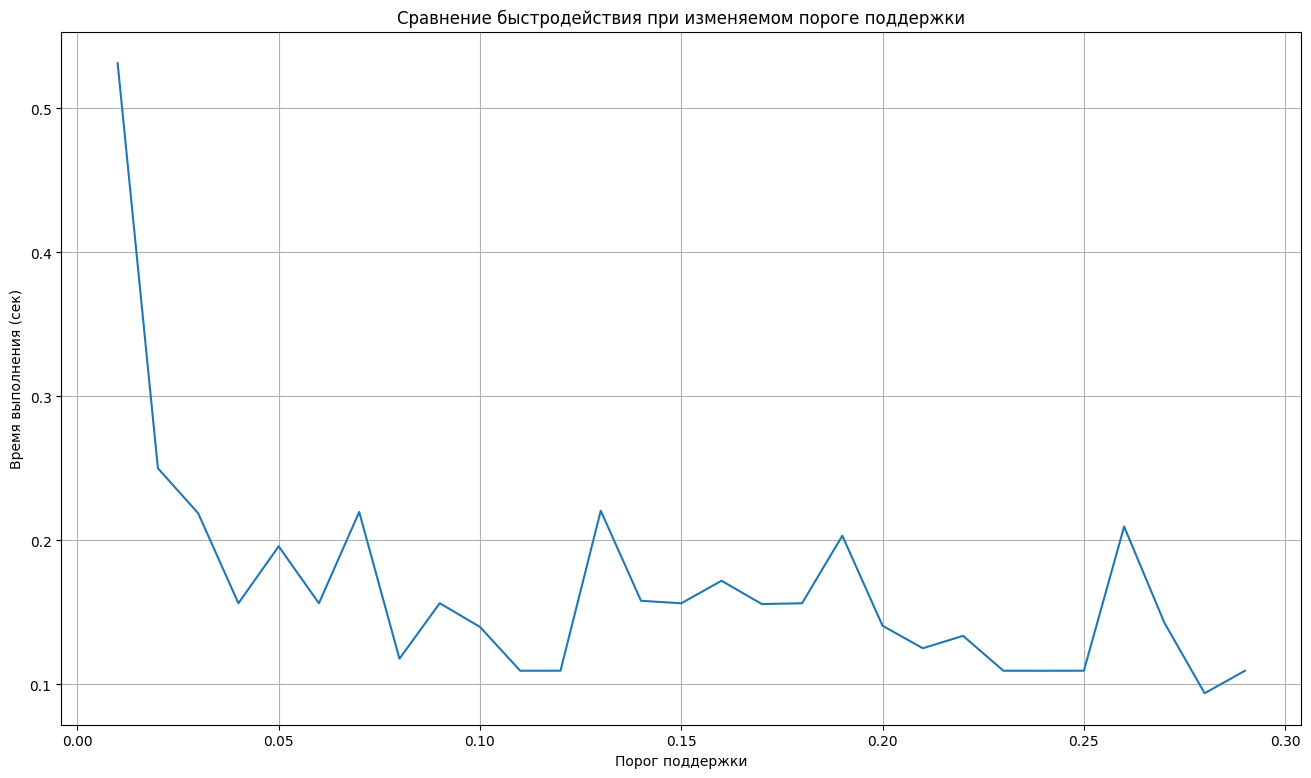

In [6]:
import time
import matplotlib.pyplot as plt


def vizulize_perfomance_by_min_sup(items, min_supp):
    times = []
    supp = []
    while min_supp < 0.3:
        start_time = time.time()
        find_frequent_itemsets(items, min_supp=min_supp, sort_by='supp')
        execution_time = time.time() - start_time
        times.append(execution_time)
        supp.append(min_supp)
        
        min_supp += 0.01
        min_supp = round(min_supp, 2)
        
    plt.figure(figsize=(16, 9))
    plt.plot(supp, times)
    plt.title('Сравнение быстродействия при изменяемом пороге поддержки')
    plt.xlabel('Порог поддержки')
    plt.ylabel('Время выполнения (сек)')
    plt.grid(True)
    plt.show()
    
    
vizulize_perfomance_by_min_sup(df, 0.01)

Из графика видно, что поиск наборов занимает длительное время при небольших значениях <br>
поддержки, однако при увеличении порога скорость вычисления начинает возврастать.<br>
Это обусловлено самим алгоритмом apriori, который при высоком пороге поддержки <br>
отбрасывает заведомо неподходящие наборы

C:\Users\santiperro\AppData\Local\Temp\ipykernel_7456\4092154251.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_items_by_length[length].append(counts.get(length, 0))
C:\Users\santiperro\AppData\Local\Temp\ipykernel_7456\4092154251.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  number_of_items_by_length[length].append(counts.get(length, 0))
C:\Users\santiperro\AppData\Local\Temp\ipykernel_7456\4092154251.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

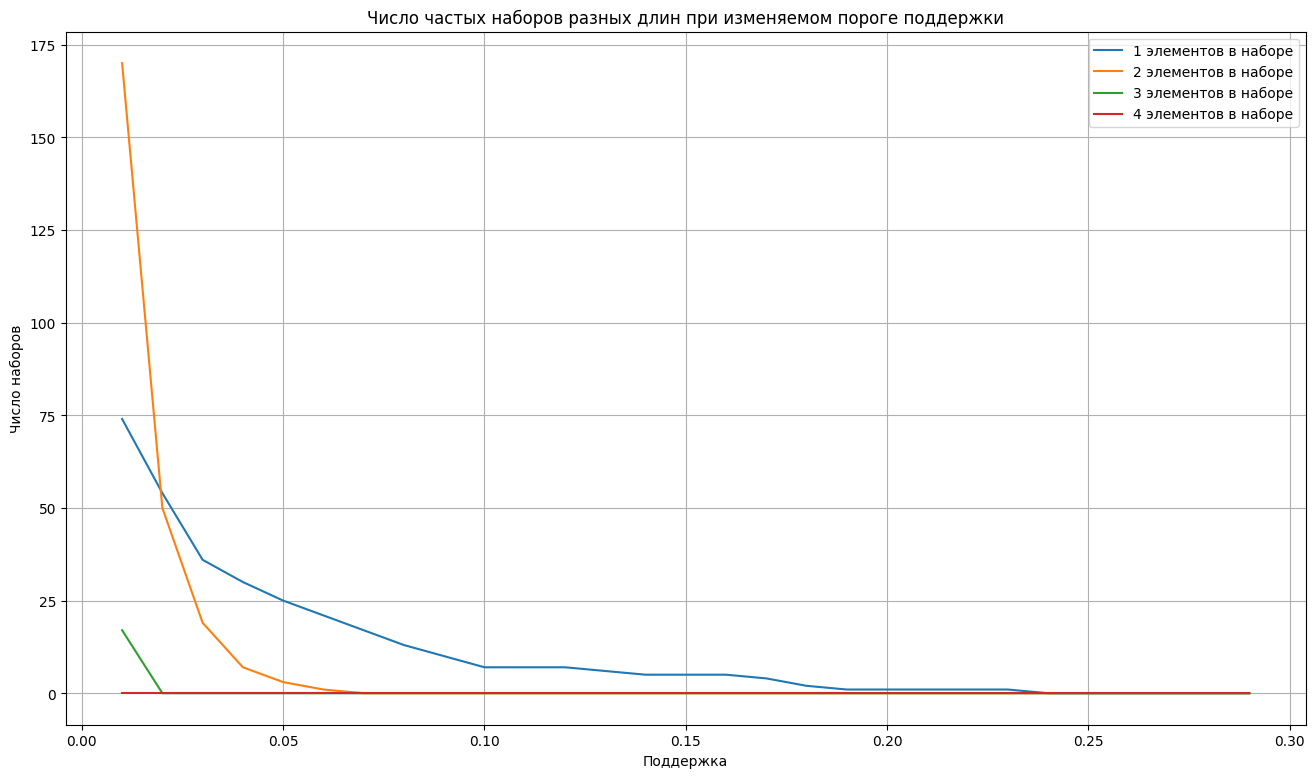

In [7]:
def vizulize_number_of_items_by_min_sup(items, min_supp):
    # Создаем словарь для хранения результатов с максимальной длиной набора 5
    number_of_items_by_length = {i: [] for i in range(1, 5)}
    supports = []
    
    while min_supp < 0.3:
        frequent_itemsets = find_frequent_itemsets(df, min_supp=min_supp, sort_by='supp', min_items=1)
        
        # Подсчет количества наборов разной длины
        counts = frequent_itemsets['itemsets'].apply(len).value_counts().sort_index()
    
        # Сохраняем результаты
        for length in number_of_items_by_length.keys():
            number_of_items_by_length[length].append(counts.get(length, 0))
        supports.append(min_supp)   
        
        min_supp += 0.01
        min_supp = round(min_supp, 2)
        
    # Создаем диаграмму
    plt.figure(figsize=(16, 9))

    # Для каждой длины набора
    for length, counts in number_of_items_by_length.items():
        plt.plot(supports, counts, label=f'{length} элементов в наборе')

    plt.xlabel('Поддержка')
    plt.ylabel('Число наборов')
    plt.title('Число частых наборов разных длин при изменяемом пороге поддержки')
    plt.legend()
    plt.grid(True)
    plt.show()
    

vizulize_number_of_items_by_min_sup(df, 0.01)

Из привиденного выше графика можно заметить, что при увеличении порога поддержки число наборов <br>
среди наборов из некскольких эементов резко снижается. Число наборов из одного элемент снижается гораздо<br>
плавнее. Из этого можно сделать вывод, что гораздо чаще люди предпочитают покупать один продукт, чем несколько


# Поиск ассоциативных правил
## Елисеев ЕВ КЭ-403

### Задание
Доработайте программу из задания Поиск частых наборов, чтобы она также выполняла поиск ассоциативных правил. <br>
Список результирующих правил должен выдаваться в удобочитаемом виде (антецедент→консеквент) с указанием поддержки<br> 
и достоверности каждого правила. Дополнительные параметры программы: порог достоверности, способ упорядочивания <br>
результирующего списка наборов (по убыванию значения поддержки или лексикографическое).<br>
Проведите эксперименты на наборах из задания 1. В экспериментах Зафиксируйте значение пороговое значение поддержки<br>
 (например, 10%), варьируйте пороговое значение достоверности (например, от 70% до 95% с шагом 5%).<br>
Выполните визуализацию полученных результатов в виде следующих диаграмм:<br>
- сравнение быстродействия поиска правил на фиксированном наборе данных при изменяемом пороге достоверности;
- общее количество найденных правил на фиксированном наборе данных при изменяемом пороге достоверности.

Подготовьте список правил, в которых антецедент и консеквент суммарно включают в себя не более семи объектов <br>
(разумное количество). Проанализируйте и изложите содержательный смысл полученного результата.<br>
Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой <br>
связный и структурированный документ со следующими разделами:  <br>
- формулировка задания; 
- гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами; 
- рисунки с результатами визуализации; 
- пояснения, раскрывающие смысл полученных результатов.

### Программа

In [9]:
from mlxtend.frequent_patterns import association_rules


def find_association_rules(data: pd.DataFrame, 
                          min_supp: float= 0.01, 
                          min_conf: float=0.01,
                          sort_by: str='supp',
                          max_left_elements: int=7,
                          max_right_elements: int=7) -> pd.DataFrame:

    def cell_to_string(cell):
        if not isinstance(cell, str):
            try:
                iter(cell)
                string = ""
                for item in cell:
                    string += f"({item}), "
                string = string[:-2]
                return string
            except TypeError:
                pass
        return cell
    
    freq_items = find_frequent_itemsets(data, min_supp=min_supp, sort_by=sort_by)
    rules = association_rules(freq_items, metric='support', min_threshold=min_supp)
    
    # Применяем порог поддержки
    rules = rules.loc[rules['confidence'] >= min_conf]
    
    # Убираем ненужные столбцы
    rules.drop('antecedent support', axis=1, inplace=True)
    rules.drop('consequent support', axis=1, inplace=True)
    rules.drop('leverage', axis=1, inplace=True)
    rules.drop('conviction', axis=1, inplace=True)
    if "zhangs_metric" in rules.columns:
        rules.drop('zhangs_metric', axis=1, inplace=True)
        
    # Округляем значения столбцов
    rules["support"] = rules["support"].round(3)
    rules["confidence"] = rules["confidence"].round(3)
    rules["lift"] = rules["lift"].round(3)
        
    
    rules["antecedents"] = rules["antecedents"].apply(lambda x: x if len(x) <= max_left_elements else None)
    rules["consequents"] = rules["consequents"].apply(lambda x: x if len(x) <= max_right_elements else None)
    rules["antecedents"] = rules["antecedents"].apply(lambda x: cell_to_string(x))
    rules["consequents"] = rules["consequents"].apply(lambda x: cell_to_string(x))
    return rules.dropna()

### Эксперименты

In [28]:
# Отсортируем по достjверности ассоциативные правила с поддержкой 0.001 и достоверностью в промежутке 0.7 - 0.75
rules = find_association_rules(df, min_supp=0.005, min_conf=0.5)
rules.sort_values(by='confidence', ascending=False).loc[rules['confidence'] <= 0.72].head(100)

,antecedents,consequents,support,confidence,lift
1965,"(суп), (замороженные овощи)",(минеральная вода),0.005,0.633,2.657
1742,"(рис), (блинчики)",(минеральная вода),0.005,0.588,2.468
1821,"(суп), (оливковое масло)",(минеральная вода),0.005,0.582,2.442
1117,"(оливковое масло), (замороженные овощи)",(минеральная вода),0.007,0.576,2.418
1150,"(говяжий фарш), (креветки)",(макароны),0.007,0.570,3.031
631,"(суп), (молоко)",(минеральная вода),0.009,0.561,2.355
1579,"(суп), (шоколад)",(минеральная вода),0.006,0.553,2.318
1178,"(яйца), (растительное масло)",(минеральная вода),0.006,0.545,2.288
553,"(говяжий фарш), (замороженные овощи)",(минеральная вода),0.009,0.543,2.279
1296,"(молоко), (индейка)",(минеральная вода),0.006,0.541,2.270


In [20]:
rules.sort_values(by='confidence', ascending=False).loc[rules['confidence'] <= 0.75].head(100)

,antecedents,consequents,support,confidence,lift
34314,"(томатный соус), (креветки)",(макароны),0.001,0.750,3.990
11081,"(говяжий фарш), (молоко), (замороженные овощи)...",(минеральная вода),0.002,0.750,3.146
31774,"(оливковое масло), (гамбургер), (блинчики)",(шоколад),0.001,0.750,4.578
31704,"(говяжий фарш), (замороженный смузи), (блинчики)",(макароны),0.001,0.750,3.990
31583,"(оливковое масло), (гамбургер), (блинчики)",(макароны),0.001,0.750,3.990
...,...,...,...,...,...
25099,"(молоко), (курица), (помидоры)",(макароны),0.001,0.714,3.800
25021,"(макароны), (шпинат)",(минеральная вода),0.001,0.714,2.997
24779,"(свежий хлеб), (яйца), (шоколад)",(минеральная вода),0.001,0.714,2.997
25180,"(говяжий фарш), (яйца), (креветки)",(макароны),0.001,0.714,3.800


Из результатов мы можем увидеть высокую частоту правила, что при покупки каких-либо ингридиентов<br>
люди покупают макароны, то есть незаменимый продукт в блюде.<br>
Также часто срабатывает правило, что к каким-либо продуктам люди докупают воду.<br>
В данном примере представлены значения достоверности от 0.7 до максмального - 0.882

In [13]:
# Отсортируем по доставерности ассоциативные правила с поддержкой 0.01 и достоверностью 0.7
rules = find_association_rules(df, min_supp=0.001, min_conf=0.8)
rules.sort_values(by='confidence', ascending=False).head(20)

,antecedents,consequents,support,confidence,lift
14010,"(говяжий фарш), (минеральная вода), (креветки)...",(макароны),0.002,0.933,4.965
14095,"(суп), (красное вино)",(минеральная вода),0.002,0.933,3.916
11925,"(макароны), (креветки), (замороженные овощи), ...",(минеральная вода),0.002,0.882,3.702
18422,"(макароны), (картофель-фри), (грибной соус)",(эскалоп),0.002,0.857,10.806
17821,"(молоко), (замороженный смузи), (помидоры)",(макароны),0.002,0.857,4.560
18335,"(говяжий фарш), (обезжиренное молоко)",(минеральная вода),0.002,0.857,3.596
19482,"(цельнозерновые макароны), (индейка)",(минеральная вода),0.001,0.846,3.550
22563,"(макароны), (молоко), (креветки), (замороженны...",(минеральная вода),0.001,0.846,3.550
22315,"(говяжий фарш), (яйца), (замороженные овощи), ...",(минеральная вода),0.001,0.846,3.550
20036,"(протеиновый батончик), (курица)",(макароны),0.001,0.846,4.501
